In [36]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.decomposition
import sklearn.discriminant_analysis
import sklearn.feature_selection
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.neighbors
import sklearn.neural_network
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.svm
import sklearn.tree
import sklearn.utils.multiclass
from IPython.display import HTML, Markdown

In [2]:
%matplotlib inline

In [3]:
%config InlineBackend.figure_formats = ['svg']

In [4]:
sns.set(style="darkgrid")

In [5]:
print(sys.version)

3.7.3 (default, Mar 27 2019, 09:23:15) 
[Clang 10.0.1 (clang-1001.0.46.3)]


In [6]:
print(time.asctime())

Wed Apr 24 10:06:02 2019


In [7]:
print(sklearn.__version__)

0.20.3


Load the Iris data set.

In [8]:
iris = sklearn.datasets.load_iris()

Construct an appropriate pandas DataFrame.

In [10]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Series([
    iris.target_names[target_index]
    for target_index in iris.target
])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Investigate the multivariate distribution.

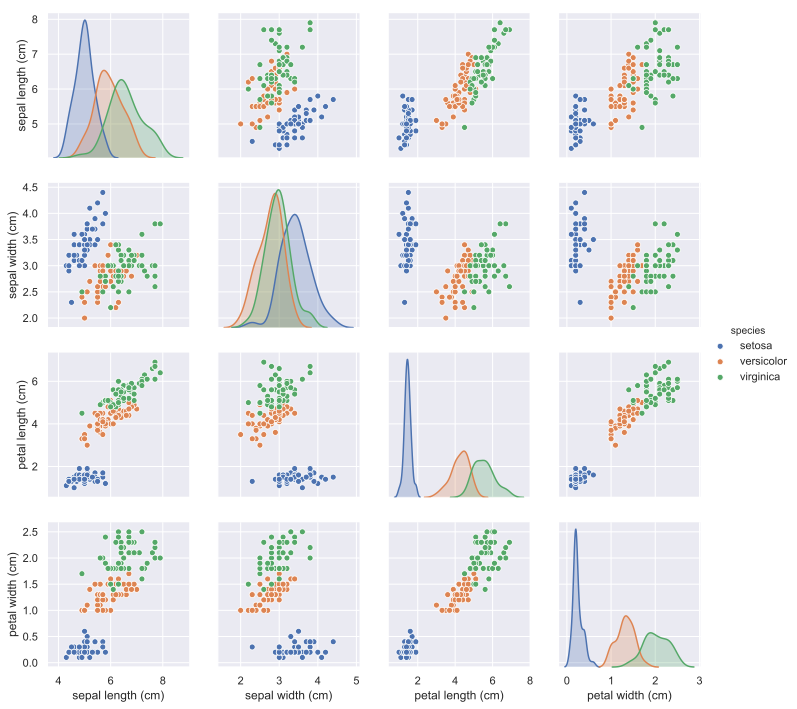

In [11]:
sns.pairplot(df, hue='species')
plt.show()

In [12]:
def train_summarize(X_, y_):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X_,
        y_, 
        test_size=0.4,
        random_state=41,
    )
    
    #clf = sklearn.svm.SVC(kernel='linear')
    clf = sklearn.neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    print(clf)
    
    
    
    y_pred = clf.predict(X_test)
    clf_report = sklearn.metrics.classification_report(y_test, y_pred)
    print('\nConfusion matrix:\n\n', sklearn.metrics.confusion_matrix(y_test, y_pred))
    print('\nClassification Report:\n\n',clf_report)
    
    return sklearn.metrics.matthews_corrcoef(y_test, y_pred)

## Feature Selection

In this section, we're just going to check on univariate, greedy feature elimintation.

### Train on Full Data Set

In [13]:
X = df.drop(['species'], axis=1)
y = df.species

train_summarize(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Confusion matrix:

 [[17  0  0]
 [ 0 20  2]
 [ 0  2 19]]

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.91      0.91      0.91        22
   virginica       0.90      0.90      0.90        21

   micro avg       0.93      0.93      0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.93      0.93      0.93        60



0.8994132439228835

### Train on Reduced Data Set

In [14]:
def select_k_best(X_, y_, k=3):
    select_k_best = sklearn.feature_selection.SelectKBest(
        score_func=sklearn.feature_selection.chi2,
        k=k,
    )
    X_reduced = select_k_best.fit_transform(X_, y_)
    
    
    select_k_best_df = pd.DataFrame(
        zip(
            select_k_best.scores_, 
            select_k_best.pvalues_,
            -np.log10(select_k_best.pvalues_).round(2),
        ), 
        index=X_.columns,
        columns=['chi2_test_statistic', 'chi2_p', 'chi2_mlp']
    )
    
    _df = pd.DataFrame(X_reduced, columns=select_k_best_df.chi2_mlp.nlargest(k).index)
    
    return _df, select_k_best_df


X_reduced, select_k_best_df = select_k_best(X, y)

In [15]:
X_reduced, select_k_best_df = select_k_best(X, y, k=3)

train_summarize(X_reduced, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Confusion matrix:

 [[17  0  0]
 [ 0 20  2]
 [ 0  1 20]]

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.95      0.91      0.93        22
   virginica       0.91      0.95      0.93        21

   micro avg       0.95      0.95      0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



0.9249790444258172

In [16]:
X_reduced, select_k_best_df = select_k_best(X, y, k=2)
train_summarize(X_reduced, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Confusion matrix:

 [[17  0  0]
 [ 0 21  1]
 [ 0  3 18]]

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.88      0.95      0.91        22
   virginica       0.95      0.86      0.90        21

   micro avg       0.93      0.93      0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



0.9008431987859865

In [17]:
X_reduced, select_k_best_df = select_k_best(X, y, k=1)
train_summarize(X_reduced, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Confusion matrix:

 [[17  0  0]
 [ 0 21  1]
 [ 0  4 17]]

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.84      0.95      0.89        22
   virginica       0.94      0.81      0.87        21

   micro avg       0.92      0.92      0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



0.8774332819955318

### Recover from Noise

In [18]:
# Make some noise!
n_uninformative = 20
E = np.random.uniform(0, 0.1, size=(len(X), n_uninformative))
E

new_columns = list(X.columns) + [f'Random {i + 1}' for i in range(n_uninformative)]
X_noised = pd.DataFrame(np.hstack((X, E)), columns=new_columns)

In [19]:
X_noised_reduced, select_k_best_df = select_k_best(X_noised, y)

select_k_best_df.head(10)

,chi2_test_statistic,chi2_p,chi2_mlp
sepal length (cm),10.817821,4.476515e-03,2.35
sepal width (cm),3.710728,1.563960e-01,0.81
petal length (cm),116.312613,5.533972e-26,25.26
petal width (cm),67.048360,2.758250e-15,14.56
Random 1,0.057313,9.717504e-01,0.01
Random 2,0.003096,9.984530e-01,0.00
Random 3,0.032417,9.839222e-01,0.01
Random 4,0.101157,9.506791e-01,0.02
Random 5,0.012558,9.937406e-01,0.00
Random 6,0.014185,9.929327e-01,0.00


In [20]:
train_summarize(X_noised_reduced, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Confusion matrix:

 [[17  0  0]
 [ 0 20  2]
 [ 0  1 20]]

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.95      0.91      0.93        22
   virginica       0.91      0.95      0.93        21

   micro avg       0.95      0.95      0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



0.9249790444258172

## Dimensionality Reduction

In [21]:
pca = sklearn.decomposition.PCA(n_components=2)
X_pca_decomposed = pca.fit_transform(X)

train_summarize(X_pca_decomposed, y)

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels. ([ref:sklearn](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py))

In [22]:
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
X_lda_decomposed = lda.fit(X, y).transform(X)

train_summarize(X_lda_decomposed, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Confusion matrix:

 [[17  0  0]
 [ 0 20  2]
 [ 0  1 20]]

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.95      0.91      0.93        22
   virginica       0.91      0.95      0.93        21

   micro avg       0.95      0.95      0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



0.9249790444258172

### Feature Engineering - Scaling

In [23]:
wine = sklearn.datasets.load_wine()

In [24]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [25]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['label'] = [wine.target_names[target_index] for target_index in wine.target]
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [26]:
# sns.pairplot(wine_df, hue='label')
# plt.show()

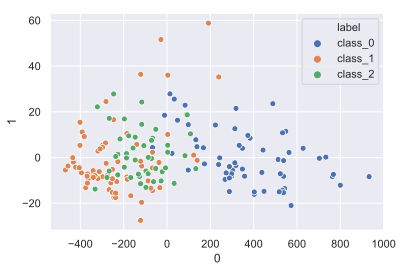

In [27]:
wine_decomposed_df = pd.DataFrame(
    sklearn.decomposition.PCA(n_components=2).fit_transform(wine.data)
)
wine_decomposed_df['label'] = wine_df.label

sns.scatterplot(data=wine_decomposed_df, x=0, y=1, hue='label')
plt.show()

In [28]:
standard_scaler = sklearn.preprocessing.StandardScaler()
pca = sklearn.decomposition.PCA(n_components=2)

wine_scaled_decomposed_df = pd.DataFrame(pca.fit_transform(standard_scaler.fit_transform(wine.data)))
wine_scaled_decomposed_df['label'] = wine_df.label

wine_scaled_decomposed_df.head()

,0,1,label
0,3.316751,-1.443463,class_0
1,2.209465,0.333393,class_0
2,2.516740,-1.031151,class_0
3,3.757066,-2.756372,class_0
4,1.008908,-0.869831,class_0


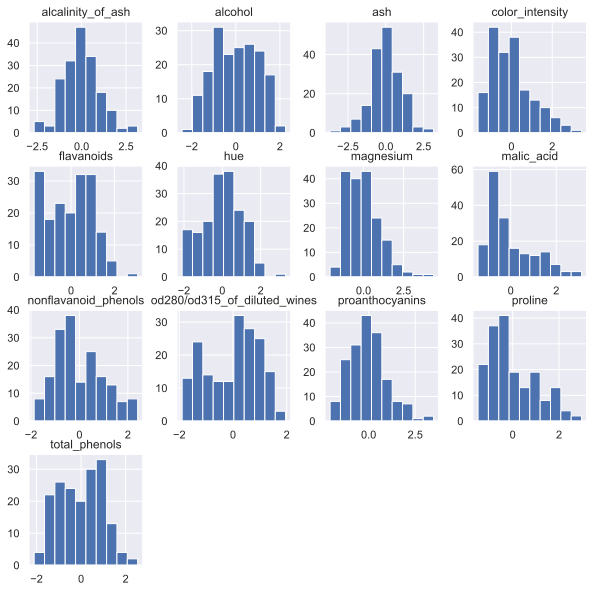

In [29]:
pd.DataFrame(standard_scaler.fit_transform(wine.data), columns=wine_df.columns[:-1]).hist(figsize=(10, 10))
plt.show()

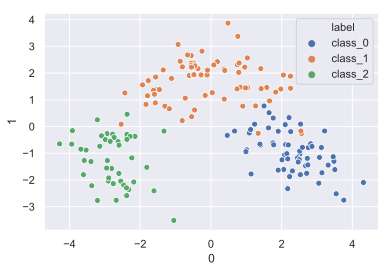

In [30]:
sns.scatterplot(data=wine_scaled_decomposed_df, x=0, y=1, hue='label')
plt.show()

## Pipelining

In [47]:
clf = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.decomposition.PCA(n_components=2),
    sklearn.neighbors.KNeighborsClassifier(),
)

In [56]:
r = sklearn.model_selection.cross_val_score(
    estimator=clf,
    X=wine.data,
    y=wine.target,
    cv=10,
)

r.mean(), r.std()

(0.9610767113863089, 0.02551894495337725)

In [57]:
r = sklearn.model_selection.cross_val_score(
    estimator=clf,
    X=wine.data,
    y=wine.target,
    cv=5,
)

r.mean(), r.std()

(0.9718868448280213, 0.0008125308080961723)

In [58]:
r = sklearn.model_selection.cross_val_score(
    estimator=clf,
    X=wine.data,
    y=wine.target,
    cv=sklearn.model_selection.LeaveOneOut(),
)

r.mean(), r.std()

(0.9550561797752809, 0.20718077432118848)